# Парсинг

Парсингом называют извлечение полезной структурированной информации из текста большого объёма. Например, из html-кода любого сайта.

Для примера возьмем сайт sports.ru

In [1]:
import requests

SPORTS_URL_TEMPLATE = 'https://www.sports.ru/football/match/{}-{}-{}/'

def get_sports_html(year, month, day):
    url = SPORTS_URL_TEMPLATE.format(year, month, day)
    return requests.get(url).text

html = get_sports_html(2009, 4, 21)
html[:6000]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ru">\r\n<head>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n<title>Футбол: матчи за 21 апреля 2009, список и статистика всех матчей за день - Sports.ru</title>\r\n<!-- metas -->\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<meta http-equiv="Content-Language" content="ru" />\r\n<meta name="copyright" content="copyright © 2019, Sports.ru" />\r\n<meta name="Robots" content="index, follow">\r\n<meta name="robots" content="all" />\r\n<meta name="description" content="Список всех матчей за 21 апреля 2009 - футбол. Онлайн трансляции, статистика голов, комментарии, отзывы болельщиков, прогнозы, результаты матчей и многое другое на Sports.ru" />\r\n<meta name="viewport" content="width=device-width" />\r\n<meta name="format-detection" content="telephone=no" />\r\n<meta name="ap

Огромный массив текста, из которого нужно извлечь, например, список всех матчей в этот день: кто с кем играл и с каким счетом.

Ну и конечно парсинг должен был универсальным: хорошо бы научиться извлекать информацию не только из кода именно этой страницы, но и страницы любого другого дня.

# Регулярные выражения

![регулярки](https://xkcd.ru/i/208_v1.jpg)

Универсальным способом парсинга абсолютно любого текста являются регулярные выражения.

**Регулярные выражения** - это язык, с помощью которого можно описать некоторое множество строк, удовлетворяющих одному шаблону. С их помощью можно решать разные задачи: проверить, что строка подходит в шаблон или даже найти все подстроки в тексте, подходящие в шаблон.

Есть стандартная библиотека re для работы с ними.

In [2]:
import re

### re.findall(template, text)
Эта функция находит все непересекающиеся вхождения template в text.

text - это обычная строка.

template - это регулярное выражение, то есть шаблон для строки.

In [3]:
re.findall(r'hello', "hello there, general kenobi")

['hello']

In [4]:
re.findall(r'hello', "hello hello hello")

['hello', 'hello', 'hello']

В регулярном выражении помимо обычных символов можно писать символ `.` - он значит "любой символ".

In [5]:
re.findall(r'h..lo', "hello there, general kenobi")

['hello']

In [6]:
re.findall(r'.e.e.', "hello there, general kenobi")

['here,', 'gener']

In [7]:
re.findall(r'Аполлон-.', "Программы Аполлон-1, Аполлон-3, Аполлон-4 и Аполлон-10")

['Аполлон-1', 'Аполлон-3', 'Аполлон-4', 'Аполлон-1']

Чтобы иметь в виду сам символ `.` (да и многие другие), нужно перед ним поставить `\` - это называется экранирование.

In [8]:
re.findall(r'..\...\.....', "Вторник 02.07.2019, Среда 03.07.2019, ха.ха.хаха")

['02.07.2019', '03.07.2019', 'ха.ха.хаха']

В предыдущем примере мы пытались распарсить дату, и туда влез пример без цифр. Вместо того, чтобы разрешать брать любой символ, можно явно в квадратных скобках написать допустимые символы на это место.

In [9]:
re.findall(r'пр[ие]вет', "хей, привет, и тебе превет, как дела, как погода, азаза")

['привет', 'превет']

In [10]:
re.findall(r'[0123456789][0123456789]\.[0123456789][0123456789]\.[0123456789][0123456789][0123456789][0123456789]',
           "Вторник 02.07.2019, Среда 03.07.2019, ха.ха.хаха")

['02.07.2019', '03.07.2019']

К счастью, для цифр не надо каждый раз перечислять все цифры, есть удобный символ `\d`, означающий любую цифру.

In [11]:
re.findall(r'\d\d\.\d\d\.\d\d\d\d', "Вторник 02.07.2019, Среда 03.07.2019, ха.ха.хаха")

['02.07.2019', '03.07.2019']

Кстати, `\D` означает все, кроме цифры.

In [12]:
re.findall(r'\D\D\.\D\D\.\D\D\D\D', "Вторник 02.07.2019, Среда 03.07.2019, ха.ха.хаха")

['ха.ха.хаха']

Обратите внимание на непересекаемость: в следующем примере нашлись лишь две строки, а не три.

In [13]:
re.findall(r'aa', "aaaa")

['aa', 'aa']

Усложняем!

`*` означает повторение группы или символа от нуля до бесконечности раз.

`+` означает повторение группы или символа от одного до бесконечности раз.

`\s` означает любой пробельный символ.

`\S` означает любой непробельный символ.

`\w` означает любую букву или цифру.

In [14]:
re.findall(r'\S+', 'абсолютно любой текст можно так разбивать на     слова')

['абсолютно', 'любой', 'текст', 'можно', 'так', 'разбивать', 'на', 'слова']

In [15]:
re.findall(r'\S+@\S+', "в тексте упоминянуты адреса hello@mail.ru, google@google.com и еще один(ya@yandex-team.ru)")

['hello@mail.ru,', 'google@google.com', 'один(ya@yandex-team.ru)']

In [16]:
re.findall(r'\w\S*@\S*\w', "в тексте упоминянуты адреса hello@mail.ru, google@google.com и конечно ya@yandex-team.ru")

['hello@mail.ru', 'google@google.com', 'ya@yandex-team.ru']

Иногда существует больше чем один способ выбрать подходящую подстроку. По умолчанию жадно берется самая длинная подстрока.

С помощью символа `?` можно наоборот брать самую короткую.

In [17]:
re.findall(r'h.*o', "hello hello hello") # жадный поиск

['hello hello hello']

In [18]:
re.findall(r'h.*?o', "hello hello hello") # ? позволяет его ограничить

['hello', 'hello', 'hello']

In [19]:
re.findall(r'a[bcd]e', 'abe abbe')

['abe']

In [20]:
re.findall(r'a[bcd]*e', 'ae abe abbe abbcde')

['ae', 'abe', 'abbe', 'abbcde']

In [21]:
re.findall(r'a[bcd]*b', 'abcbdcbde')

['abcbdcb']

Вот еще несколько кейсов того, что можно писать в регулярном выражении:

`?` - встречаемость 0 или 1 раз

`R1|R2` - либо регулярное выражение `R1`, либо `R2`

`[..]` - любой из символов внутри (можно писать `[a-z], [А-Я]`)

`[^..]` - любой не из символов внутри

`\b` - граница слова

`^, $` - начало и конец строки

`{n}` - ровно n раз

In [22]:
re.findall(r'\d{5}', '12345612345')

['12345', '61234']

In [23]:
re.findall(r'\d\d/\d\d/\d{4}', '11/02/1992')

['11/02/1992']

In [24]:
re.findall(r'\w{2,3}', 'a aa aaa aa aaa bbb bb cccc')

['aa', 'aaa', 'aa', 'aaa', 'bbb', 'bb', 'ccc']

In [25]:
re.findall(r'[-+]?\d+', '1 2 -1 +2456')

['1', '2', '-1', '+2456']

In [26]:
re.findall(r'15|24', '15 24')

['15', '24']

In [27]:
re.findall(r'^.{2}\d', '123')

['123']

`(..)` - это группа. Можно искать шаблон сразу с несколькими группами.

In [28]:
re.findall(r'\S+-\S+', 'бывают слова типа кафе-мороженое, шкаф-купе и даже Почти-Безголовый-Ник')

['кафе-мороженое,', 'шкаф-купе', 'Почти-Безголовый-Ник']

In [29]:
re.findall(r'(\S+)-\S+', 'бывают слова типа кафе-мороженое, шкаф-купе и даже Почти-Безголовый-Ник')

['кафе', 'шкаф', 'Почти-Безголовый']

In [30]:
re.findall(r'(\S+)-(\S+)', 'бывают слова типа кафе-мороженое, шкаф-купе и даже Почти-Безголовый-Ник')

[('кафе', 'мороженое,'), ('шкаф', 'купе'), ('Почти-Безголовый', 'Ник')]

### Попробуйте порешать задачи отсюда

https://regex101.com/r/aGn8QC/2

- Найдите все натуральные числа (возможно, окружённые буквами);

- Найдите все «слова», написанные капсом (то есть строго заглавными), возможно внутри настоящих слов (аааБББввв);

- Найдите слова, в которых есть русская буква, а когда-нибудь за ней цифра;

- Найдите все слова, начинающиеся с русской или латинской большой буквы (`\b` — граница слова);

- Найдите слова, которые начинаются на гласную (`\b` — граница слова);

- Найдите все натуральные числа, не находящиеся внутри или на границе слова;

- Найдите строчки, в которых есть символ `*` (`.` — это точно не конец строки!);

- Найдите строчки, в которых есть открывающая и когда-нибудь потом закрывающая скобки;

Отдельно:

- напишите выражение, которые сможет расспознать номер телефона в тексте (российский)

### Сайт с упражнениями
Есть сайт с задачами, где надо придумать регулярное выражение, в которое подходят какие-то строчки, а другие не подходят. Они удобно разбиты по темам, можно постепенно их проходить:

https://regexone.com/lesson/introduction_abcs


### Сайт с кроссовордами

https://regexcrossword.com/

### Доп. задачи для умных

1) Придумайте регулярное выражение, котороем матчит только все бинарные строки, содержащие подстроку `111`.

2) Придумайте регулярное выражение, которое матчит только все бинарные строки, НЕ содержащие подстроку `111`.

3) Придумайте регулярное выражение, которое матчит только все слова, у которых левая половина равна правой.

Вам понадобится символ `\1`, означающий строку, равную первой группе (которая в скобках).

In [31]:
# пример использования: найдены только буквы, совпадающие с соседем
re.findall(r'(.) and \1', 'a and b and c and d and d and k and k and k')

['d', 'k']

4) Придумайте регулярное выражение, которое содержит все строки, состоящие из четного числа символов `1`.

5) Придумайте регулярное выражение, которое содержит все строки, состоящие из составного числа символов `1`.

6) Придумайте регулярное выражение, которое содержит все строки, состоящие из простого числа символов `1`.

### Регулярные выражения для парсинга HTML

Если внимательно изучить код страницы, можно найти где упоминаются матчи и команды в них участвующие (я просто сделал поиск по слову Арсенал).

А именно внутри тега `<tr data-match-id="536289">`.

In [32]:
html

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ru">\r\n<head>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n<title>Футбол: матчи за 21 апреля 2009, список и статистика всех матчей за день - Sports.ru</title>\r\n<!-- metas -->\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<meta http-equiv="Content-Language" content="ru" />\r\n<meta name="copyright" content="copyright © 2019, Sports.ru" />\r\n<meta name="Robots" content="index, follow">\r\n<meta name="robots" content="all" />\r\n<meta name="description" content="Список всех матчей за 21 апреля 2009 - футбол. Онлайн трансляции, статистика голов, комментарии, отзывы болельщиков, прогнозы, результаты матчей и многое другое на Sports.ru" />\r\n<meta name="viewport" content="width=device-width" />\r\n<meta name="format-detection" content="telephone=no" />\r\n<meta name="ap

In [33]:
re.findall(r'<tr data-match-id="536289">.*', html)

['<tr data-match-id="536289">']

In [34]:
re.findall(r'<tr data-match-id="536289">.*</tr>', html)

[]

Ест проблема: символ `.` не учитывает переводы строк (так принято). Поэтому давайте разрешим перевод строки.

In [35]:
re.findall(r'<tr data-match-id="536289">(.|\n)*</tr>', html)

['\n']

Теперь другая проблема: из-за появления группы выводится не вся строка

In [36]:
re.findall(r'(<tr data-match-id="536289">(.|\n)*</tr>)', html)

[('<tr data-match-id="536289">\n<td class="alLeft gray-text">23:00</td>\n<td class="alLeft gray-text">Завершен</td>\n<td class="owner-td">\n<div class="rel"><i class="fader"></i><i class="icon-flag icon-flag_1413 flag-s flag-1413" title="Англия"></i><a class="player" href="https://www.sports.ru/liverpool/" title="Ливерпуль">Ливерпуль</a></div>\n</td>\n<td class="score-td score-popover js-active" data-control="Common.Score" data-id="536289"><a class="score" href="https://www.sports.ru/football/match/536289/">\n         \n<b><span class="s-left">4</span> : <span class="s-right">4</span></b>\n</a>\n</td>\n<td class="guests-td">\n<div class="rel"><i class="fader"></i><i class="icon-flag icon-flag_1413 flag-s flag-1413" title="Англия"></i><a class="player" href="https://www.sports.ru/arsenal/" title="Арсенал">Арсенал</a></div>\n</td>\n<td class="alRight"><div class="match-service-icons" data-video-type="video"><i id="tvbutton_536289" class="ico camera"  title="Все видео"></i><i id="mytvbutt

Теперь другая проблема: внутрь попало слишком много из-за жадности.

In [37]:
re.findall(r'(<tr data-match-id="536289">(.|\n)*?</tr>)', html)

[('<tr data-match-id="536289">\n<td class="alLeft gray-text">23:00</td>\n<td class="alLeft gray-text">Завершен</td>\n<td class="owner-td">\n<div class="rel"><i class="fader"></i><i class="icon-flag icon-flag_1413 flag-s flag-1413" title="Англия"></i><a class="player" href="https://www.sports.ru/liverpool/" title="Ливерпуль">Ливерпуль</a></div>\n</td>\n<td class="score-td score-popover js-active" data-control="Common.Score" data-id="536289"><a class="score" href="https://www.sports.ru/football/match/536289/">\n         \n<b><span class="s-left">4</span> : <span class="s-right">4</span></b>\n</a>\n</td>\n<td class="guests-td">\n<div class="rel"><i class="fader"></i><i class="icon-flag icon-flag_1413 flag-s flag-1413" title="Англия"></i><a class="player" href="https://www.sports.ru/arsenal/" title="Арсенал">Арсенал</a></div>\n</td>\n<td class="alRight"><div class="match-service-icons" data-video-type="video"><i id="tvbutton_536289" class="ico camera"  title="Все видео"></i><i id="mytvbutt

Теперь другая проблема: нашелся только один матч, у других матчей другие id

In [38]:
re.findall(r'(<tr data-match-id="\d+">(.|\n)*?</tr>)', html)

[('<tr data-match-id="536289">\n<td class="alLeft gray-text">23:00</td>\n<td class="alLeft gray-text">Завершен</td>\n<td class="owner-td">\n<div class="rel"><i class="fader"></i><i class="icon-flag icon-flag_1413 flag-s flag-1413" title="Англия"></i><a class="player" href="https://www.sports.ru/liverpool/" title="Ливерпуль">Ливерпуль</a></div>\n</td>\n<td class="score-td score-popover js-active" data-control="Common.Score" data-id="536289"><a class="score" href="https://www.sports.ru/football/match/536289/">\n         \n<b><span class="s-left">4</span> : <span class="s-right">4</span></b>\n</a>\n</td>\n<td class="guests-td">\n<div class="rel"><i class="fader"></i><i class="icon-flag icon-flag_1413 flag-s flag-1413" title="Англия"></i><a class="player" href="https://www.sports.ru/arsenal/" title="Арсенал">Арсенал</a></div>\n</td>\n<td class="alRight"><div class="match-service-icons" data-video-type="video"><i id="tvbutton_536289" class="ico camera"  title="Все видео"></i><i id="mytvbutt

Мы научились извлекать гораздо меньшие куски html-кода с матчами, теперь можно с помощью групп выделить и более мелкие кусочки.

In [39]:
s = re.findall(r'<tr data-match-id="\d+">(.|\n)*?' + \
               r'<td class="owner-td">(.|\n)*?' + \
               r'<a class="player" href="https://www.sports.ru/(\S+)/" title="(\S+)">(.|\n)*?' + \
               r'</tr>',
               html)

for x in s:
    print(x[2])
    print(x[3])
    print()

liverpool
Ливерпуль

getafe
Хетафе

tags/4765096
Нумансия

tags/5940135
Волочанин-Ратмир

tags/3039154
Спортакадемклуб

pskov-747
Псков-747

tekstilshchik
Текстильщик

tags/6540066
Смена-Зенит

lokomotiv-2
Казанка

tags/6182419
Истра

tags/3612640
Ковентри

reading
Рединг

tags/1358574
Чарльтон

bayer
Байер

tags/3282337
Гренобль

tags/16125071
Адмира

brighton
Брайтон

tags/5626788
Нортхэмптон

tags/7129748
Йовил

tags/68804448
Дагенхэм

tags/5834817
Ротерхэм

tags/3818806
Лутон

tags/68805343
Кроули

tags/6846001
Рексхэм

tags/73171385
Льюэс

tags/68805515
Мэнсфилд

tags/68805316
Стивенейдж

tags/6566093
Хистон

tags/6599603
Барроу

tags/102610834
Фарсли

tags/73172122
Таррок

tags/71662824
Саутпорт

tags/73160389
Стейлибридж

tags/68805484
Тэмуорт

tags/101820546
Берскау

tags/102605785
Бат

tags/101588226
Бэшли

tags/73160094
Гайзли

tags/73167993
Фарнборо

tags/75028743
Хэндон

tags/101630999
Марин

tags/101613868
Редбридж

tags/102616717
Аксбридж

tags/110958900
Садбери

tags/101

Так мы извлекли всех хозяев матчей. Если увеличить регэксп еще в нескольк раз, можно еще и гостей извлечь.

In [40]:
s = re.findall(r'<tr data-match-id="\d+">(.|\n)*?' + \
               r'<td class="owner-td">(.|\n)*?' + \
               r'<a class="player" href="(\S+)" title="(\S+)">(.|\n)*?' + \
               r'<span class="s-left">(\d+)</span>(.|\n)*?' + \
               r'<span class="s-right">(\d+)</span>(.|\n)*?' + \
               r'<td class="guests-td">(.|\n)*?' + \
               r'<a class="player" href="(\S+)" title="(\S+)">(.|\n)*?' + \
               r'</tr>',
               html)

for x in s:
    print(x[2])
    print(x[3])
    print(x[5])
    print(x[7])
    print(x[10])
    print(x[11])
    print()

https://www.sports.ru/liverpool/
Ливерпуль
4
4
https://www.sports.ru/arsenal/
Арсенал

https://www.sports.ru/getafe/
Хетафе
1
2
https://www.sports.ru/athletic/
Атлетик

https://www.sports.ru/tags/5940135/
Волочанин-Ратмир
1
1
https://www.sports.ru/tags/3039154/
Спортакадемклуб

https://www.sports.ru/pskov-747/
Псков-747
0
1
https://www.sports.ru/sever/
Север

https://www.sports.ru/tekstilshchik/
Текстильщик
3
4
https://www.sports.ru/tags/6182427/
Нара-ШБФР

https://www.sports.ru/tags/6540066/
Смена-Зенит
0
1
https://www.sports.ru/tags/3283616/
Шексна

https://www.sports.ru/lokomotiv-2/
Казанка
2
1
https://www.sports.ru/tags/6182419/
Истра

https://www.sports.ru/tags/3612640/
Ковентри
1
1
https://www.sports.ru/tags/3620027/
Барнсли

https://www.sports.ru/reading/
Рединг
2
2
https://www.sports.ru/cardiff-city/
Кардифф

https://www.sports.ru/bayer/
Байер
4
1
https://www.sports.ru/fc-mainz-05/
Майнц

https://www.sports.ru/tags/3282337/
Гренобль
0
1
https://www.sports.ru/rennes-fc/
Ренн

ht

Ну и превратим это в красивый список словарей.

In [41]:
import requests

SPORTS_URL_TEMPLATE = 'https://www.sports.ru/football/match/{}-{}-{}/'
SPORTS_MATCHES_REGEXP = r'<tr data-match-id="\d+">(.|\n)*?' + \
                        r'<td class="owner-td">(.|\n)*?' + \
                        r'<a class="player" href="(\S+)" title="(\S+)">(.|\n)*?' + \
                        r'<span class="s-left">(\d+)</span>(.|\n)*?' + \
                        r'<span class="s-right">(\d+)</span>(.|\n)*?' + \
                        r'<td class="guests-td">(.|\n)*?' + \
                        r'<a class="player" href="(\S+)" title="(\S+)">(.|\n)*?' + \
                        r'</tr>'

def get_all_matches(year, month, day):
    url = SPORTS_URL_TEMPLATE.format(year, month, day)
    html = requests.get(url).text
    raw_matches = re.findall(SPORTS_MATCHES_REGEXP, html)
    matches = []
    for x in raw_matches:
        matches.append({'owner': {'id': x[2],
                                  'name': x[3]},
                        'guest': {'id': x[10],
                                  'name': x[11]},
                        'score': (x[5], x[7])})
    return matches

print(get_all_matches(2009, 4, 21))

[{'owner': {'id': 'https://www.sports.ru/liverpool/', 'name': 'Ливерпуль'}, 'guest': {'id': 'https://www.sports.ru/arsenal/', 'name': 'Арсенал'}, 'score': ('4', '4')}, {'owner': {'id': 'https://www.sports.ru/getafe/', 'name': 'Хетафе'}, 'guest': {'id': 'https://www.sports.ru/athletic/', 'name': 'Атлетик'}, 'score': ('1', '2')}, {'owner': {'id': 'https://www.sports.ru/tags/5940135/', 'name': 'Волочанин-Ратмир'}, 'guest': {'id': 'https://www.sports.ru/tags/3039154/', 'name': 'Спортакадемклуб'}, 'score': ('1', '1')}, {'owner': {'id': 'https://www.sports.ru/pskov-747/', 'name': 'Псков-747'}, 'guest': {'id': 'https://www.sports.ru/sever/', 'name': 'Север'}, 'score': ('0', '1')}, {'owner': {'id': 'https://www.sports.ru/tekstilshchik/', 'name': 'Текстильщик'}, 'guest': {'id': 'https://www.sports.ru/tags/6182427/', 'name': 'Нара-ШБФР'}, 'score': ('3', '4')}, {'owner': {'id': 'https://www.sports.ru/tags/6540066/', 'name': 'Смена-Зенит'}, 'guest': {'id': 'https://www.sports.ru/tags/3283616/', 'n

In [42]:
print(get_all_matches(2009, 10, 20)[4])

{'owner': {'id': 'https://www.sports.ru/barcelona/', 'name': 'Барселона'}, 'guest': {'id': 'https://www.sports.ru/rubin/', 'name': 'Рубин'}, 'score': ('1', '2')}


Выводы:
* регулярками можно парсить html и вообще всё
* но не надо, это устрашающе и практически всегда можно проще

# Парсинг html библиотеками

Зачем вообще придумывали формат HTML, если не для того, чтобы его можно было удобно парсить?

На любой стандартизированный формат всегда есть библиотека, которая его парсит сама, без каких-либо регулярных выражений.

## Библиотека BeautifulSoup
![Soup](https://img3.goodfon.ru/original/5184x3456/1/2c/pervoe-blyudo-sup-pyure-gribnoy.jpg)

In [43]:
#!pip install bs4

In [44]:
from bs4 import BeautifulSoup

import urllib
import requests

import re

In [45]:
r = 'https://lenta.ru/news/2018/10/24/trump_reaction/'
r = requests.get(r)

soup = BeautifulSoup(r.content, 'lxml')
print(soup.find('img')['src'])

https://icdn.lenta.ru/images/2018/10/24/00/20181024002013530/pic_a6570a4873348504df7cc6b56b273f44.jpg


### Получили ответ, значит, можно работать со страницей дальше

Создаём объект soup и передаём ему содержимое страницы.

In [46]:
soup = BeautifulSoup(r.content, 'lxml')
type(soup)

bs4.BeautifulSoup

Чтобы было удобнее на всё это смотреть, можно применить метод prettify()

In [47]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <title>
   Трамп ответил Путину на предложение о встрече: Политика: Мир: Lenta.ru
  </title>
  <meta content="Трамп ответил Путину на предложение о встрече: Политика: Мир: Lenta.ru" name="title"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoQXhRZUUYXElwOFg==","queueTime":0,"applicationTime":119,"agent":""}
  </script>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==t

### BS обработал страницу - можем теперь находить содержимое тегов

Если просто сделать soup.find(<tag>), то получим тег и всё, что в него входит

In [48]:
soup.find('h1')

<h1 class="b-topic__title" itemprop="headline">Трамп ответил Путину на предложение о встрече</h1>

А так можно получить только текст

In [49]:
title = soup.find('h1').text
title

'Трамп ответил Путину на\xa0предложение о\xa0встрече'

Получить значение атрибутов

In [50]:
soup.find('h1').attrs

{'class': ['b-topic__title'], 'itemprop': 'headline'}

In [51]:
soup.find('h1').attrs['class']

['b-topic__title']

Одинаковых тегов может быть очень много, и можно вытащить их все

In [52]:
soup.findAll('p')

[<p>Президент США <a href="/tags/persons/tramp-donald/" target="_blank">Дональд Трамп</a> прокомментировал предложение своего российского коллеги <a href="/tags/persons/putin-vladimir/" target="_blank">Владимира Путина</a> провести двусторонний саммит 11 ноября в Париже. Об этом он рассказал на встрече с советником по национальной безопасности страны <a href="/tags/persons/bolton-dzhon/" target="_blank">Джоном Болтоном</a>, передает <a href="/tags/organizations/reuters/" target="_blank">агентство </a><a class="source" href="http://www.reuters.com/" target="_blank">Reuters</a>.</p>,
 <p>«Я думаю, мы вероятно встретимся. Она [встреча] еще не подготовлена, но, скорее всего, она состоится», — сказал глава американского государства. Он отметил, что этот вопрос в настоящий момент обсуждается.</p>,
 <p>23 октября Кремль <a href="https://lenta.ru/news/2018/10/23/summit/" target="_blank">анонсировал</a> встречу Путина и Трампа. Помощник российского лидера <a href="/tags/persons/ushakov-yuriy/" 

## Sports.ru
Посмотрите, как легко и без регэкспов решается задача извлечения матчей.

In [53]:
SPORTS_URL_TEMPLATE = 'https://www.sports.ru/football/match/{}-{}-{}/'

def get_all_matches(year, month, day):
    url = SPORTS_URL_TEMPLATE.format(year, month, day)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    matches = []
    for x in soup.findAll('tr'):
        try:
            if 'data-match-id' in x.attrs:
                owner = x.find('td', {'class': 'owner-td'}).find('a').attrs
                guest = x.find('td', {'class': 'guests-td'}).find('a').attrs
                score = (x.find('span', {'class': 's-left'}),
                         x.find('span', {'class': 's-right'}))
                matches.append({'owner': {'href': owner['href'],
                                          'name': owner['title']},
                                'guest': {'href': guest['href'],
                                          'name': guest['title']},
                                'score': score})
        except:
            pass
    return matches

print(get_all_matches(2009, 4, 21))

[{'owner': {'href': 'https://www.sports.ru/liverpool/', 'name': 'Ливерпуль'}, 'guest': {'href': 'https://www.sports.ru/arsenal/', 'name': 'Арсенал'}, 'score': (<span class="s-left">4</span>, <span class="s-right">4</span>)}, {'owner': {'href': 'https://www.sports.ru/real/', 'name': 'Реал Мадрид'}, 'guest': {'href': 'https://www.sports.ru/getafe/', 'name': 'Хетафе'}, 'score': (<span class="s-left">3</span>, <span class="s-right">2</span>)}, {'owner': {'href': 'https://www.sports.ru/tags/4765096/', 'name': 'Нумансия'}, 'guest': {'href': 'https://www.sports.ru/athletic/', 'name': 'Атлетик'}, 'score': (<span class="s-left">1</span>, <span class="s-right">2</span>)}, {'owner': {'href': 'https://www.sports.ru/tags/5940135/', 'name': 'Волочанин-Ратмир'}, 'guest': {'href': 'https://www.sports.ru/tags/6182423/', 'name': 'Динамо Вологда'}, 'score': (<span class="s-left">1</span>, <span class="s-right">1</span>)}, {'owner': {'href': 'https://www.sports.ru/tags/3039154/', 'name': 'Спортакадемклуб'

## lib.ru
Теперь давайте попробуем извлечь тексты произведений.

In [56]:
url = 'http://lib.ru/DOWLATOW/'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')
print(soup.prettify())

<html>
 <head>
  <title>
   Lib.Ru: Сергей Довлатов
  </title>
 </head>
 <body>
  <pre><center><h1><small><a href="/">Lib.Ru</a>: </small>Сергей Довлатов</h1><font size="-1"><form action="GrepSearch" method="GET"><b>Поиск</b>:<input name="Search" size="9" type="text"/><input type="submit" value="search"/></form></font> <b><a href="/PROZA/">Проза</a> <a href="/INPROZ/">Переводы</a> <a href="/POEZIQ/">Поэзия</a> <a href="/RUFANT/">Фантастика</a> <a href="/RUSS_DETEKTIW/">Детективы</a> <a href="http://az.lib.ru/">Классика</a> <a href="/HISTORY/">История</a>  <a href="/.dir_StripDir.html">И ДР.<small>&gt;&gt;&gt;</small></a></b></center><center>[<a href="What-s-new"><b>НОВИНКИ</b></a>][<a href="/HITPARAD/"><b>Хитпарад</b></a>][<a href="http://samlib.ru/">Самиздат</a>][<a href="http://music.lib.ru/">Музыка</a>][<a href="http://www.artlib.ru/">Художники</a>][<a href="http://world.lib.ru">Заграница</a>][<a href="http://turizm.lib.ru">Туризм</a>][<a href="http://artofwar.ru"><b>ArtOfWar</b></a

In [57]:
soup.find('title').text

'Lib.Ru: Сергей Довлатов'

In [58]:
stories = soup.find('body').find_all('li')
stories

[<li><tt><small><a href="arxew.txt_Contents"><b>огл</b></a>( 39k) [  23]       </small></tt> <a href="arxew.txt"><b>Андрей Арьев. Наша маленькая жизнь</b></a>
 <br/>
 </li>,
 <li><tt><small><a href="dowlatow.txt_Contents"><b>огл</b></a>(137k) [  14]       </small></tt> <a href="dowlatow.txt"><b>Соло на ундервуде</b></a>
 </li>,
 <li><tt><small><a href="kompromiss.txt_Contents"><b>огл</b></a>(256k) [  88]       </small></tt> <a href="kompromiss.txt"><b>Компромисс</b></a>
 <!--
 <uralres@etel.ru>
 <shaulreznik@newmail.net>
 <alex_se@mail.ru>
 -->
 <br/>
 <dir><dir><a name="0"></a><h2>Рассказы</h2></dir></dir>
 </li>,
 <li><tt><small><a href="ariel.txt_Contents"><b>огл</b></a>(  6k) [  26]       </small></tt> <a href="ariel.txt"><b>Ариэль</b></a>
 </li>,
 <li><tt><small><a href="igrushka.txt_Contents"><b>огл</b></a>(  7k) [  24]       </small></tt> <a href="igrushka.txt"><b>Игрушка</b></a>
 </li>,
 <li><tt><small><a href="wstretilisx.txt_Contents"><b>огл</b></a>( 29k) [  52]       </small

In [59]:
for s in stories:
    print(s.find('a'))

<a href="arxew.txt_Contents"><b>огл</b></a>
<a href="dowlatow.txt_Contents"><b>огл</b></a>
<a href="kompromiss.txt_Contents"><b>огл</b></a>
<a href="ariel.txt_Contents"><b>огл</b></a>
<a href="igrushka.txt_Contents"><b>огл</b></a>
<a href="wstretilisx.txt_Contents"><b>огл</b></a>
<a href="winograd.txt_Contents"><b>огл</b></a>
<a href="literatura.txt_Contents"><b>огл</b></a>
<a href="r_predstawlenie.txt_Contents"><b>огл</b></a>
<a href="dalxshe.txt_Contents"><b>огл</b></a>
<a href="ogonek.txt_Contents"><b>огл</b></a>
<a href="http://www.svoboda.org/programs/cicles/Dovlatov/"><b>"Довлатов и окрестности" (подготовил А.Генис)</b></a>
<a href="../MEMUARY/PEKUROVSKAYA/dovlatov.txt_Contents"><b>огл</b></a>
<a href="http://www.moldsat.md/sympad/archive/etext1/orig/ru/prose/dovlatov/"><b>Подборка Довлатова на Sympad</b></a>
<a href="http://www.sergeidovlatov.com"><b>Все о Довлатове у Александра Данилюка</b></a>
<a href="http://www.pseudology.org/Dovlatov/Podrugi/Zibunova/index.htm"><b>Тамара Зи

In [60]:
for s in stories[:11]:
    print(s.find('a')['href'])

arxew.txt_Contents
dowlatow.txt_Contents
kompromiss.txt_Contents
ariel.txt_Contents
igrushka.txt_Contents
wstretilisx.txt_Contents
winograd.txt_Contents
literatura.txt_Contents
r_predstawlenie.txt_Contents
dalxshe.txt_Contents
ogonek.txt_Contents


Попробуйте через питон перейти на страницы первых трёх рассказов и вывести по первому параграфу из них.

Если получилось, соберите полностью тексты рассказов и сохраните каждый в отдельном файле.

# А теперь парсинг мемов 
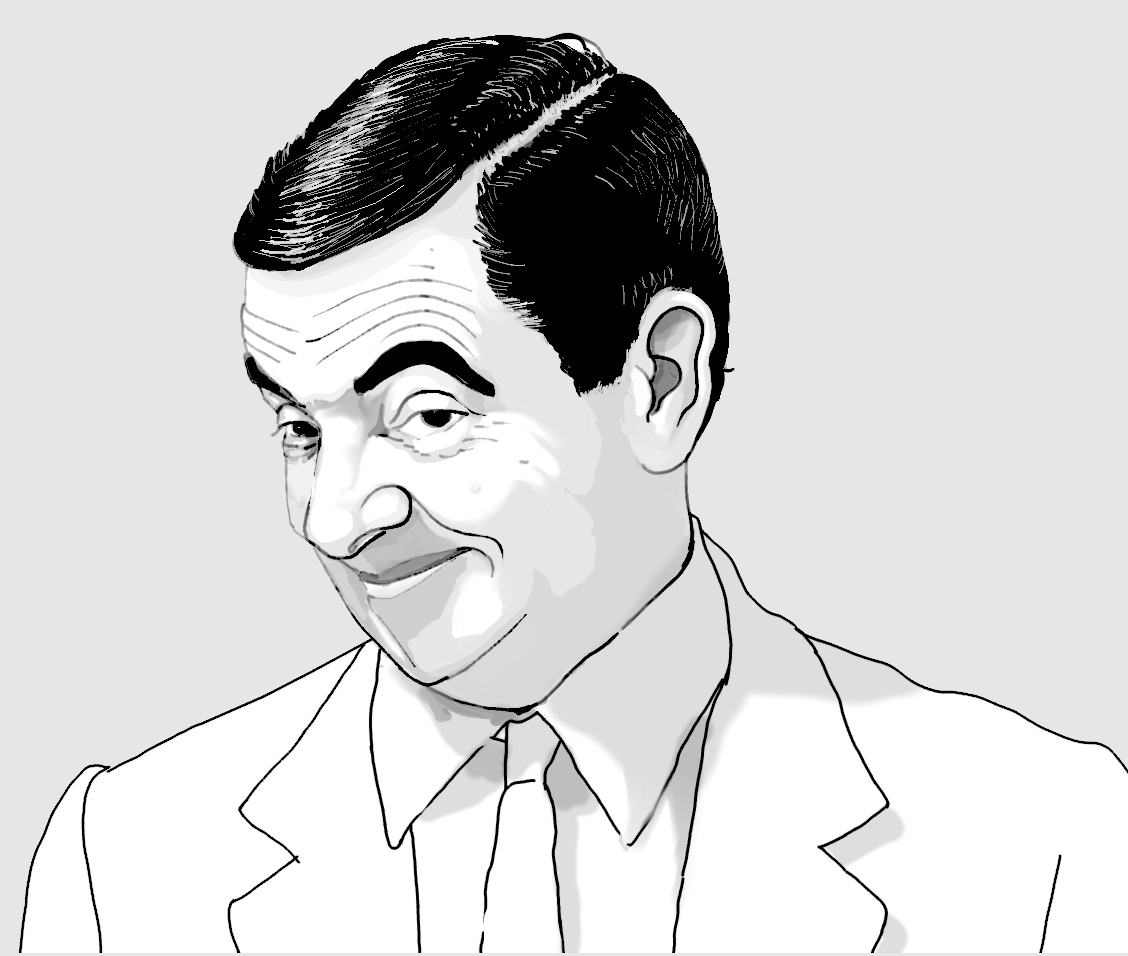

[Парсить будем этот сайт](https://memegenerator.net/memes/popular/alltime)


Сохранять будем само изображение, описание к нему с сайта и варианты подписи к этому изображению.

## Импортируем нужные библиотеки

In [1]:
from __future__ import division
from bs4 import BeautifulSoup
import requests
import shutil
import os.path

In [14]:
memes_path = 'memes'
captions_path = 'captions'

n_captions = 14 # кол-во страниц подписей к ним
n_templates = 14 # кол-во страниц мемов (на странице 15 мемов)

Получаем текст HTML код страницы по ее номеру:

In [15]:
def get_page(i):
    if i == 1:
        url = 'https://memegenerator.net/memes/popular/alltime'
    else:
        url = 'https://memegenerator.net/memes/popular/alltime/page/' + str(i)
    r = requests.get(url)
    return r.text

Получаем все теги, содержащие описание мема, из кода страницы:

In [16]:
def get_memes(text):
    soup = BeautifulSoup(text,'html.parser')
    return soup.find_all(class_='char-img')

In [17]:
chars = get_memes(get_page(1))
# получаем все теги содержащие нужные ссылки
# ссылки на страницы с подписями
links = [char.find('a') for char in chars]
# ссылки на картинки
imgs = [char.find('img') for char in chars]

Парсим одну страницу:

In [18]:
!mkdir memes
!mkdir captions

mkdir: cannot create directory ‘memes’: File exists
mkdir: cannot create directory ‘captions’: File exists


In [21]:
def parse_page(text, page_number):
    Uerrors = 0 # количество ошибок
    chars = get_memes(text)
    # получаем все теги содержащие нужные ссылки
    # ссылки на страницы с подписями
    links = [char.find('a') for char in chars]
    # ссылки на картинки
    imgs = [char.find('img') for char in chars]
    # проверяем, что не произошло троллингов
    assert len(links) == len(imgs)
    for j, img in enumerate(imgs):
        img_url = img['src'] #ссылка с картинкой
        response = requests.get(img_url, stream=True)
        name_of_file = img_url.split('/')[-1]
        # если у вас тут вылетает ошибка - создайте папку memes там же, где и ноутбук
        img_filepath = os.path.join(memes_path, name_of_file) 
        # сохраняем картинку
        with open(img_filepath, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
        del response
        # сохраняем подписи к картинке
        captions_filepath = os.path.join(captions_path, name_of_file[:-4])
        with open(captions_filepath, 'w') as f:
            f.write('')
        for k in range(1, n_captions):
            if k == 1:
                URL = 'https://memegenerator.net' + links[j]['href']
            else:
                URL = 'https://memegenerator.net' + links[j]['href'] + '/images/popular/alltime/page/' + str(k)
            R = requests.get(URL)
            SOUP = BeautifulSoup(R.text,'html.parser')
            CHARS = SOUP.find_all(class_='char-img')
            IMGS = [char.find(class_='optimized-instance-container img') for char in CHARS]
            with open(captions_filepath, 'a') as f:
                for IMG in IMGS:
                    # print(IMG.prettify())
                    try:
                        f.write('%s\n' % (IMG.find(class_='optimized-instance-text1').text))
                    except UnicodeEncodeError:
                        Uerrors += 1
                        pass
    return Uerrors

# Ну а теперь начинаем собирать данные по-крупному 

In [22]:
for i in range(1, n_templates):
    text = get_page(i)
    errors_count = parse_page(text, i)
    print('Page {} is completed with {} errors'.format(i, errors_count))

Page 1 is completed with 0 errors
Page 2 is completed with 0 errors
Page 3 is completed with 0 errors
Page 4 is completed with 0 errors
Page 5 is completed with 0 errors
Page 6 is completed with 0 errors
Page 7 is completed with 0 errors


KeyboardInterrupt: 

### P. S.

Питон можно запускать не только в в ноутбуках, но и как отдельные скрипты.

Из консоли это можно делать так, используя аргументы с помощью библиотеки argparse:

In [1]:
!python3 main.py -t 5 -l en -n there,_General_Kenobi

Hello, there,_General_Kenobi!
Hello, there,_General_Kenobi!
Hello, there,_General_Kenobi!
Hello, there,_General_Kenobi!
Hello, there,_General_Kenobi!
